In [42]:
from pathlib import Path
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier import ClassificationReport



In [43]:
#load the data file 
data = Path('clean_train.csv')
titanic_df = pd.read_csv(data)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## SVM Model

In [44]:
# Segment the features from the target
X = titanic_df.drop("Survived", axis=1)
y = titanic_df['Survived']

In [45]:
y.count()

891

In [46]:
# Use the train_test_split function to create training and testing subsets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)
X_train.shape

(668, 10)

In [47]:
# Instantiate a linear SVM model
from sklearn.svm import SVC 
titanic_svm_model = SVC(kernel='linear')

In [48]:
# Fit the data
titanic_svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# Score the accuracy and print results

print(f'Training Data Score: {titanic_svm_model.score(X_train, y_train)}')
print(f'Testing Data Score: {titanic_svm_model.score(X_test,y_test)}')

Training Data Score: 0.7919161676646707
Testing Data Score: 0.7713004484304933


In [50]:
# Make predictions using the test data 
svm_predictions = titanic_svm_model.predict(X_test)
svm_results = pd.DataFrame({"Prediction": svm_predictions, "Actual": y_test}).reset_index(drop=True)
svm_results.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,1,1


In [51]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_predictions)

array([[116,  21],
       [ 30,  56]], dtype=int64)

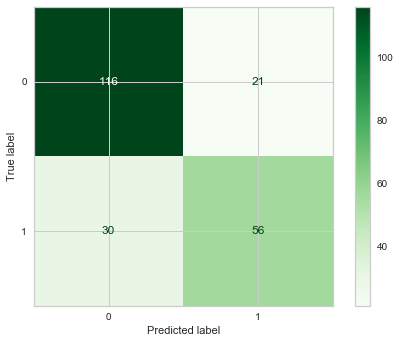

In [52]:
plot_confusion_matrix(titanic_svm_model, X_test, y_test, cmap = 'Greens')  


In [53]:
#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       137
           1       0.73      0.65      0.69        86

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



C:\Users\cjohn\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


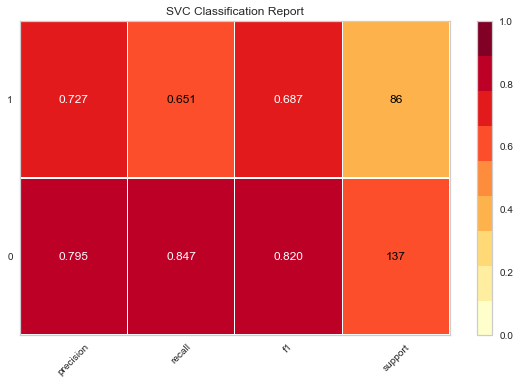

In [60]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(titanic_svm_model, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  
   

AttributeError: 'Series' object has no attribute 'split'